## _Track Evaluation_

- Running _`trkx_from_gnn.py`_ produces recostucted tracks (track candiates)
- Running _`trkx_reco_eval.py`_ gives reconstruction evaluation: _`eff, fake rate, dup. rate, etc`_

Let's perform inspection after track evaluation.

In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
sys.path.append('..')

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## _A. Inspection of Epsilon in DBSCAN_

1. Various $\epsilon$ for DBSCAN in `trkx_from_gnn.py`
2. Choose the best $\epsilon$ based on _`eff, fake rate, dup. rate`_) after `trkx_reco_eval.py`

**NOTE:** The $\epsilon$ in DBSCAN is alternative to chosing a cut on the `edge_score`.

In [7]:
epsilon = [0.015, 0.025, 0.050, 0.075, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.55, 0.75, 0.85, 0.95, 1.0]

In [8]:
# FWP: IGNN
outname="fwp"
eff_phys = [87.2165, 87.3646, 87.4315, 87.4550, 87.3293, 87.0990, 86.8334, 86.5408, 85.4020, 84.0847, 82.9753, 80.6508, 78.4991, 73.2167, 16.5687]
eff_tech = [96.6127, 96.7740, 96.8500, 96.8766, 96.7327, 96.4860, 96.1941, 95.8648, 94.5731, 93.1120, 91.8883, 89.3128, 86.9306, 81.1078, 18.6763]
purity   = [99.3764, 99.4655, 99.5184, 99.5268, 99.5334, 99.5336, 99.5463, 99.5613, 99.6222, 99.4562, 99.2742, 98.2568, 98.7797, 96.8064, 47.7511]
clones   = [7.0048, 6.1859, 5.2207, 4.6082, 4.2689, 3.7827, 3.4842, 3.1144, 2.2536, 1.6902, 1.4752, 1.2884, 1.2231, 1.1924, 0.0000]

In [9]:
# covert to ndarrays
eff_phys = np.array(eff_phys)
eff_tech = np.array(eff_tech)
purity   = np.array(purity)
clones   = np.array(clones)
epsilon = np.array(epsilon)

In [10]:
# plt.style.use('ggplot')
# mpl.rcParams.update(mpl.rcParamsDefault)

In [11]:
import matplotlib.ticker as ticker

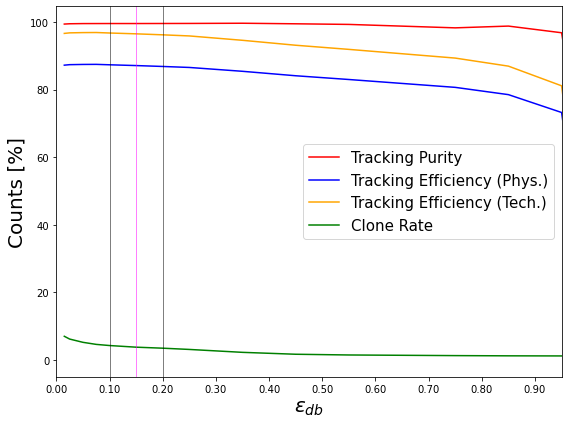

In [16]:
# init subplots
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax.plot(epsilon, purity, linestyle='-', linewidth=1.5, color='red', label="Tracking Purity")
ax.plot(epsilon, eff_phys, linestyle='-', linewidth=1.5, color='blue', label="Tracking Efficiency (Phys.)")
ax.plot(epsilon, eff_tech, linestyle='-', linewidth=1.5, color='orange', label="Tracking Efficiency (Tech.)")
ax.plot(epsilon, clones, linestyle='-', linewidth=1.5, color='green', label="Clone Rate")

plt.axvline(x=0.10, linewidth=0.5, color='k')
plt.axvline(x=0.15, linewidth=0.5, color='magenta')
plt.axvline(x=0.20, linewidth=0.5, color='k')
# plt.axvline(x=0.25, linewidth=0.5, color='magenta')
#plt.axvline(x=0.3, linewidth=0.5, color='k')

# plotting params
# ax.set_title('Track evaluation (efficiency vs epsilon)')
ax.set_xlabel('$\epsilon_{db}$', fontsize=20)
ax.set_ylabel('Counts [%]', fontsize=20)
ax.set_xlim(0, 0.95)
#ax.set_ylim(0.0, 100)
#ax.set_yscale('log')

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


ax.grid(False)
ax.legend(fontsize=15, loc='best')
fig.tight_layout()
fig.savefig(outname+"_epsilon_scan.pdf")